**Aluno:** Danilo Gazzoli Resende

In [20]:
!pip install python-louvain

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.cm as cm
import community.community_louvain as cl

In [23]:
G = nx.read_gml('../desafio/data/GraphMissingEdges.gml')

a) Identifique comunidades usando o método Louvain

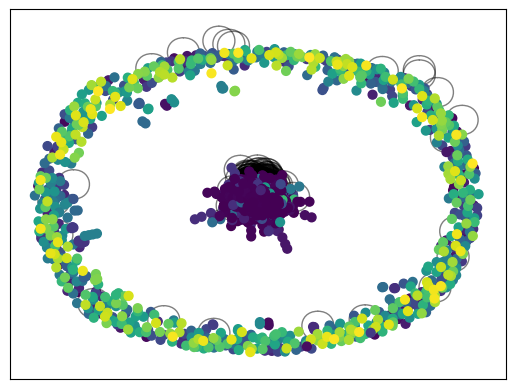

In [27]:
louvain = cl.best_partition(G)
nx.set_node_attributes(G, louvain, "louvain")
pos = nx.spring_layout(G)

# Cores para representar uma comunidade em particular
cmap = cm.get_cmap('viridis', max(louvain.values()) + 1)

nx.draw_networkx_nodes(G, pos, louvain.keys(), node_size=40, cmap=cmap, node_color=list(louvain.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

b) Identifique comunidades utilizando o k-clique. Utilize k=4.

In [30]:
k_clique_4 = list(nx.algorithms.community.k_clique_communities(G, 4))
index = 0
for comu in k_clique_4:
    print(f'comunidade {index}')
    for no in list(comu):
        G.nodes[str(no)]['k_clique_4'] = index
    print('*'*100)
    index += 1



comunidade 0
****************************************************************************************************
comunidade 1
****************************************************************************************************
comunidade 2
****************************************************************************************************
comunidade 3
****************************************************************************************************
comunidade 4
****************************************************************************************************
comunidade 5
****************************************************************************************************
comunidade 6
****************************************************************************************************
comunidade 7
****************************************************************************************************
comunidade 8
***************************************************************************

c) Traduza os ids dos nós em cada cluster pelos nomes de suas categorias (referentes aos locais que eles se referem). Os resultados parecem fazer sentido? Mostre um exemplo que ilustra a sua resposta. 

In [33]:
from networkx.algorithms.community import k_clique_communities

In [36]:
categories = pd.read_csv("../desafio/data/categories.csv")

In [37]:
c = list(k_clique_communities(G, 4))

for i in c:
    for n in list(i):
        catRaw = G.nodes[n]['categories'].split(',')
        allCategories = ''
        for c in catRaw:
            allCategories += categories[categories['CategoryId']==int(c)]['names'].values[0]+' '
        print(allCategories)
    print('-------------------------------------')

Active Life Baseball Fields Stadiums & Arenas Arts & Entertainment 
Restaurants Breakfast & Brunch Coffee & Tea French Food Creperies Cafes 
Restaurants Sandwiches Food Ice Cream & Frozen Yogurt 
Soul Food Barbeque American (Traditional) Restaurants 
Breweries Food 
Coffee & Tea Food 
Sandwiches Breakfast & Brunch Restaurants Diners 
Tex-Mex Mexican Bars Beer Bar Restaurants Nightlife 
Indian Food Food Delivery Services Restaurants 
Dive Bars American (Traditional) Nightlife Bars Restaurants 
Food American (New) Brewpubs Restaurants Breweries 
Shopping Eyewear & Opticians Optometrists Health & Medical 
Restaurants Chinese 
Thai Restaurants 
Restaurants Food Specialty Food Vegetarian Health Markets 
Sushi Bars Food Coffee & Tea Restaurants 
Burgers Chicken Wings Sandwiches Restaurants 
Sandwiches Breakfast & Brunch Restaurants American (New) Waffles American (Traditional) 
Event Planning & Services Nightlife Venues & Event Spaces Wine Bars Restaurants Bars Italian Pizza Breakfast & Brun

Karaoke Nightlife Gay Bars Dance Clubs Bars 
Restaurants Italian 
Restaurants Diners Sandwiches Breakfast & Brunch 
Nightlife Restaurants Sports Bars Bars American (Traditional) Burgers 
Restaurants Cocktail Bars Nightlife Bars Hawaiian 
Ice Cream & Frozen Yogurt Food Restaurants Pizza Gelato Italian 
Seafood Restaurants 
Restaurants Breakfast & Brunch Diners American (Traditional) 
Middle Eastern Mediterranean Lebanese Restaurants 
Burgers Restaurants Vegetarian Sandwiches 
Food Restaurants Do-It-Yourself Food BeerWineSpirits Mongolian Asian Fusion 
Juice Bars & Smoothies Beer Bar Nightlife American (New) Cocktail Bars Bars Food Fast Food Burgers Restaurants 
Nail Salons Beauty & Spas 
Restaurants Irish Arts & Entertainment Bars American (Traditional) Nightlife 
Specialty Food Restaurants Fruits & Veggies Cafes Delis Grocery Food Coffee & Tea 
Breweries Food 
Parks Active Life Botanical Gardens Arts & Entertainment 
Restaurants Vietnamese 
Restaurants Tacos Mexican 
Diners Restaurants

French Restaurants 
American (Traditional) Mexican Restaurants Tacos Vegan 
Cocktail Bars Car Dealers Arts & Entertainment Bars Cuban Real Estate Agents Real Estate Home Services Music Venues Automotive Restaurants Nightlife American (Traditional) 
Tea Rooms Desserts Coffee & Tea Sandwiches Restaurants Food 
Mobile Phones IT Services & Computer Repair Local Services Computers Shopping 
Specialty Food Festivals Food Arts & Entertainment Fruits & Veggies 
Bars Beer Bar Chicken Wings Restaurants Salad Sandwiches Burgers Food Pizza Nightlife 
Sushi Bars Restaurants Chinese Breakfast & Brunch Japanese 
Sandwiches Restaurants 
Challenge Courses Arts & Entertainment Escape Games Arcades Active Life 
Italian Restaurants Pizza 
Greek Diners American (Traditional) Seafood Restaurants 
Event Planning & Services Caterers Restaurants Italian Seafood Gluten-Free Food American (New) Desserts Salad 
Restaurants Szechuan Chinese 
Food Trucks Food 
Fitness & Instruction Gyms Yoga Trainers Active Life Sp

In [40]:
c = cl.best_partition(G)

df = pd.DataFrame({'idVenue':c.keys(),'cluster':c.values()})

for chave in range(0,max(c.values())+1):
    filtro = df[df.cluster == chave]
    for idx, row in filtro.iterrows():
            catRaw = G.nodes[row['idVenue']]['categories'].split(',')
            allCategories = ''
            for c in catRaw:
                try:
                    allCategories += categories[categories['CategoryId']==int(c)]['names'].values[0]+' '
                except:
                    continue
            print(allCategories)
    print('-------------------------------------')

Restaurants Cafes 
Shopping Arts & Crafts Shoe Stores Costumes Fashion 
Chinese Restaurants 
Asian Fusion Restaurants Sushi Bars Chinese 
Chinese Asian Fusion Caterers Restaurants Fast Food Event Planning & Services Food Food Delivery Services Vegetarian 
Discount Store Shopping Fashion Department Stores Home Decor Furniture Stores Home & Garden 
American (New) Bars Restaurants Burgers Cafes Nightlife 
Food Bubble Tea 
Restaurants Pizza 
Ice Cream & Frozen Yogurt Food 
Piercing Tattoo Beauty & Spas 
Performing Arts Cinema Opera & Ballet Arts & Entertainment 
Maternity Wear Fashion Baby Gear & Furniture Shopping Children's Clothing 
Beauty & Spas Barbers 
Grocery Food 
Caterers Breakfast & Brunch Event Planning & Services Food Trucks Mexican Food Restaurants 
Greek Diners American (Traditional) Seafood Restaurants 
Pizza Restaurants 
Sandwiches Vietnamese Asian Fusion Bars Nightlife Vegetarian Restaurants 
Burgers Sandwiches Restaurants Greek 
Restaurants Mexican Latin American 
America

American (Traditional) American (New) Burgers Restaurants 
Home & Garden Kitchen & Bath Furniture Stores Shopping Home Decor 
Sandwiches Italian Salad Pizza Restaurants 
Shopping Discount Store Toy Stores Electronics 
Restaurants Coffee & Tea Cafes Food 
Landmarks & Historical Buildings Arts & Entertainment Museums Public Services & Government 
Automotive Auto Parts & Supplies 
Food Bakeries Custom Cakes 
Breakfast & Brunch Diners Restaurants American (Traditional) 
Restaurants Nightlife Sandwiches American (New) Sports Bars American (Traditional) Bars 
Shopping Toy Stores 
Burgers Restaurants Breakfast & Brunch 
Home Decor Home & Garden Shopping Antiques 
Auto Parts & Supplies Auto Repair Automotive Car Dealers 
Event Planning & Services Bars American (New) Breakfast & Brunch Burgers Seafood Caterers Restaurants Nightlife American (Traditional) Diners 
Steakhouses Seafood Nightlife American (Traditional) Lounges Restaurants Wine Bars Event Planning & Services Caterers Bars 
Pet Servic

Health & Medical Optometrists 
Bars Beer Bar Chicken Wings Restaurants Salad Sandwiches Burgers Food Pizza Nightlife 
Gluten-Free Restaurants Salad Sandwiches Vegetarian Soup 
Food Shopping Specialty Food Kitchen & Bath Home & Garden 
Hair Salons Massage Nail Salons Beauty & Spas 
Restaurants Seafood Chicken Wings Comfort Food Southern 
Local Services Professional Services Notaries Shipping Centers Printing Services Signmaking 
Team Building Activities Event Planning & Services Shopping Arts & Crafts 
Food Wine Bars Coffee & Tea Grocery Sandwiches American (New) Bars Nightlife Restaurants 
Restaurants Nightlife Bars Latin American Caribbean 
Cambodian Seafood Asian Fusion Restaurants 
Nightlife Salad American (Traditional) Restaurants Sports Bars Bars 
Seafood Restaurants American (Traditional) 
Hair Stylists Shopping Hair Salons Barbers Beauty & Spas Cosmetics & Beauty Supply Men's Hair Salons 
Food Trucks Food 
Soup Food Sandwiches Breakfast & Brunch Salad Bagels Restaurants 
Burgers

Caterers Southern Sandwiches Restaurants Event Planning & Services Salad American (New) 
IT Services & Computer Repair Computers Shopping Mobile Phones Local Services Electronics 
Active Life Races & Competitions 
Food Ice Cream & Frozen Yogurt 
Nail Salons Beauty & Spas 
Grocery Food 
Wine Bars Nightlife Bars 
Funeral Services & Cemeteries Local Services 
Active Life Fitness & Instruction Barre Classes Gyms 
Comfort Food Restaurants American (Traditional) 
American (Traditional) Sports Bars Bars Restaurants Chicken Wings Nightlife 
Accessories Shopping Women's Clothing Fashion 
Shopping Fashion Department Stores 
American (New) Soup Salad Gastropubs Restaurants American (Traditional) Sandwiches 
Eyewear & Opticians Shopping 
Pizza Restaurants 
Florists Shopping Flowers & Gifts 
Hookah Bars Nightlife Bars 
Automotive Car Stereo Installation Auto Detailing Tires 
Burgers Chicken Wings Sandwiches Restaurants 
Health & Medical Walk-in Clinics Medical Centers Urgent Care Doctors 
Pet Groom

Desserts Restaurants Bakeries Cafes Coffee Roasteries Food Coffee & Tea 
Fashion Sporting Goods Shopping Sports Wear 
Bars Hot Dogs Restaurants Nightlife 
Arts & Entertainment Performing Arts Cinema 
Event Planning & Services Hotels Hotels & Travel 
Office Equipment Mobile Phone Repair Shopping IT Services & Computer Repair Local Services Printing Services Shipping Centers 
Shopping Colleges & Universities Tours Art Galleries Hotels & Travel Education Arts & Entertainment 
Bridal Shopping 
Pet Services Pets Pet Stores Pet Groomers Pet Adoption 
Bars Tapas/Small Plates Cocktail Bars Nightlife Restaurants Wine Bars 
Steakhouses Italian Seafood Restaurants 
Tennis Sports Clubs Soccer Active Life 
Coffee & Tea Food Fast Food Restaurants Burgers 
Golf Active Life Country Clubs Arts & Entertainment 
Sushi Bars Food Coffee & Tea Restaurants 
Performing Arts Arts & Entertainment 
Restaurants Noodles Soup Chinese 
Restaurants American (New) 
Shopping UsedVintageConsignment Shoe Stores Accessori

Fish & Chips Sports Bars American (New) Nightlife Restaurants Bars 
Restaurants Italian 
Restaurants Pizza 
Active Life Shopping Arts & Crafts Arts & Entertainment Art Galleries Parks Festivals 
Health & Medical Doctors 
Pizza Restaurants 
Real Estate Apartments Hotels Event Planning & Services Hotels & Travel Home Services Real Estate Services 
French Bakeries Specialty Food Food Restaurants Macarons 
Restaurants Food Pizza 
Local Services Sewing & Alterations 
Barbeque Restaurants 
Health Markets Specialty Food Food Shopping Vitamins & Supplements 
Breakfast & Brunch Restaurants American (New) American (Traditional) Burgers 
Bars Nightlife Dive Bars 
Restaurants Pizza 
Veterinarians Pets 
Local Services Sewing & Alterations 
Local Services Sewing & Alterations 
Restaurants Food Specialty Food Coffee & Tea Cafes Tea Rooms Coffee Roasteries 
Burgers American (New) Restaurants Gastropubs 
French Restaurants 
Shopping Shoe Stores Fashion 
Food Desserts Mexican Restaurants Beer Bar Bars N

Sandwiches Bars Nightlife Restaurants Sports Bars Chicken Wings American (New) 
Local Flavor Public Art 
Sushi Bars Asian Fusion Restaurants 
Hotels & Travel Event Planning & Services Hotels 
Pizza Restaurants Chicken Wings Italian 
Desserts Bakeries Food 
Shoe Stores Shopping Fashion Shoe Repair Local Services 
Restaurants Tacos Mexican 
Cocktail Bars Car Dealers Arts & Entertainment Bars Cuban Real Estate Agents Real Estate Home Services Music Venues Automotive Restaurants Nightlife American (Traditional) 
Soup Food Bagels Restaurants Breakfast & Brunch Coffee & Tea Salad Sandwiches 
Event Planning & Services Florists Floral Designers Shopping Flowers & Gifts 
Health & Medical Optometrists 
Optometrists Eyewear & Opticians Health & Medical Shopping 
Restaurants Breakfast & Brunch Burgers American (Traditional) American (New) 
Restaurants Karaoke Food Nightlife Bars 
Hair Salons Beauty & Spas 
Restaurants Thai 
Home Services Real Estate Services Real Estate 
Restaurants Italian 
Event

Coffee & Tea Food 
Tires Auto Repair Automotive Oil Change Stations Auto Parts & Supplies 
Tanning Beauty & Spas 
Food Coffee & Tea 
Cocktail Bars Nightlife Bars Lounges 
Home Services Internet Service Providers Television Service Providers Security Systems Professional Services 
Oil Change Stations Automotive 
Restaurants Buffets Food Barbeque American (New) 
Real Estate Real Estate Agents Home Services 
Health & Medical Hospitals 
Beauty & Spas Nail Salons 
American (Traditional) Restaurants Steakhouses Breakfast & Brunch 
Pizza Salad Restaurants Sandwiches 
Fashion Children's Clothing Shopping Women's Clothing Men's Clothing 
Beauty & Spas Tanning Beds Tanning Spray Tanning Skin Care 
Grocery Food Restaurants Sandwiches Imported Food Ethnic Food Specialty Food 
Beauty & Spas Nail Salons 
Nightlife Bars Sports Bars 
Restaurants Korean 
American (New) Cafes Restaurants 
Pizza Restaurants Sandwiches Fast Food 
Hotels & Travel Bed & Breakfast Event Planning & Services Hotels 
Local Flav

Health & Medical Chiropractors 
-------------------------------------
Home Services Real Estate Apartments 
-------------------------------------
Restaurants Burgers Fast Food 
-------------------------------------
Shopping Comic Books BooksMagsMusicVideo 
-------------------------------------
Women's Clothing Fashion Shopping Bridal 
-------------------------------------
Tattoo Beauty & Spas Piercing 
Accessories Shopping Men's Clothing Formal Wear Restaurants Shoe Stores Fashion Bespoke Clothing Plus Size Fashion 
Beauty & Spas Nail Salons 
Tattoo Beauty & Spas 
Shopping Women's Clothing Men's Clothing Home Decor Fashion Home & Garden 
Beauty & Spas Tattoo Piercing 
-------------------------------------
Home Decor Mattresses Home & Garden Shopping Furniture Stores 
-------------------------------------
Home Services Home Inspectors 
-------------------------------------
Real Estate Banks & Credit Unions Financial Services Mortgage Brokers Home Services Investing 
Shopping Flowers & G

Restaurants Sandwiches Fast Food 
Venues & Event Spaces Hotels Event Planning & Services Hotels & Travel 
Venues & Event Spaces Event Planning & Services Hotels Hotels & Travel 
Event Planning & Services Apartments Hotels & Travel Hotels Real Estate Home Services Venues & Event Spaces 
-------------------------------------
Shopping Bridal 
-------------------------------------
Local Services Clock Repair Watch Repair 
-------------------------------------
Interval Training Gyms Gyms Active Life Fitness & Instruction 
-------------------------------------
Automotive Towing 
-------------------------------------
Beauty & Spas Hair Salons 
Departments of Motor Vehicles Public Services & Government 
Gas Stations Convenience Stores Automotive Food 
Grocery Food Shopping Drugstores 
Car Dealers Automotive 
Bars Restaurants Nightlife Dive Bars 
Cafes Sandwiches Restaurants 
Sandwiches Restaurants Pizza Chicken Wings 
Medical Spas Doctors Health & Medical Cosmetic Surgeons Beauty & Spas Hair R

Automotive Car Dealers 
-------------------------------------
Pet Sitting Pet Services Pets 
-------------------------------------
Hotels & Travel Food Food Tours Breweries Tours Bus Tours Beer Tours 
-------------------------------------
Restaurants 
-------------------------------------
Hotels & Travel Car Rental 
-------------------------------------
Chiropractors Health & Medical 
-------------------------------------
Home Services Water Heater Installation/Repair Plumbing 
Car Rental Automotive Hotels & Travel 
Home Services Property Management Apartments Real Estate 
-------------------------------------
Burgers Fast Food Restaurants Hot Dogs 
-------------------------------------
Restaurants Pizza 
-------------------------------------
Nightlife Pubs Bars Sports Bars 
-------------------------------------
Beauty & Spas Skin Care Massage Day Spas 
-------------------------------------
Restaurants Salad 
-------------------------------------
Body Shops Hotels & Travel Motorcycle D

Automotive Car Dealers 
-------------------------------------
Home Services Real Estate Apartments 
-------------------------------------
Accessories Women's Clothing Shopping Fashion Jewelry 
-------------------------------------
American (Traditional) Restaurants 
-------------------------------------
Hair Salons Beauty & Spas 
-------------------------------------
Event Planning & Services Venues & Event Spaces Hotels Hotels & Travel 
-------------------------------------
Insurance Real Estate Services Real Estate Mortgage Brokers Home Services Financial Services 
-------------------------------------
Shopping Vape Shops 
-------------------------------------
Education Fitness & Instruction Middle Schools & High Schools Active Life 
-------------------------------------
Post Offices Local Services Public Services & Government Shipping Centers 
-------------------------------------
Home Services Pressure Washers Gutter Services Window Washing 
-------------------------------------
Lo